<a href="https://colab.research.google.com/github/cg1011/california-house-price-prediction/blob/main/i_california_housing_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. California Housing Exploratory Data Analysis
### Prediction of median house prices for California districts derived from the 1990 census.

In [ ]:
# Import libraries
from subprocess import call

import patsy
import folium as folium
from folium import plugins
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.display import Image
from matplotlib import pyplot
from numpy import isnan
from patsy.highlevel import dmatrices, dmatrix
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.impute import KNNImputer
from sklearn.impute._iterative import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import GridSearchCV
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


<div class="alert alert-block alert-info">
<b>Load data</b>
</div>

In [ ]:
# Import data
df_prices = pd.read_csv('/content/drive/MyDrive/california house pricing/housing.csv', delimiter = ",")
df_original = df_prices.copy()
df = df_prices.copy()


#### Entire set features

In [ ]:
df_prices.head(20)
print(df_prices.shape)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


(20640, 10)


We will peform our analysis as follows:

- Missing data checks.
- Model accuracy check.
- EDA (without missing data replacement).
- Variable adjustments & missing value imputation.
- Model accuracy check

<div class="alert alert-block alert-info">
<b>Missing values</b>
</div>

We quantify the number of missing values in the data set:

In [ ]:
# Check for null values
missing_values_train = df_prices.isnull().sum()
missing_values_train = missing_values_train.to_frame(name='missing_number')
missing_values_train['missing_percentage'] = (missing_values_train['missing_number']/df_prices.shape[0])*100
for index, row in missing_values_train.iterrows():
    if (row['missing_number'] > 0):
        print ("For \"%s\" the number of missing values are: %d (%.0f%%)" %  (index,
                                                                     row['missing_number'],
                                                                    row['missing_percentage']))

For "total_bedrooms" the number of missing values are: 207 (1%)


In [ ]:
missing_values_train

,missing_number,missing_percentage
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


Consider a sample of missing values from the data set:

In [ ]:
df_prices[df_prices.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


We observed 207 (1%) null values for <i>total_bedrooms</i>.

The visualised missing values look as follows for the training set:

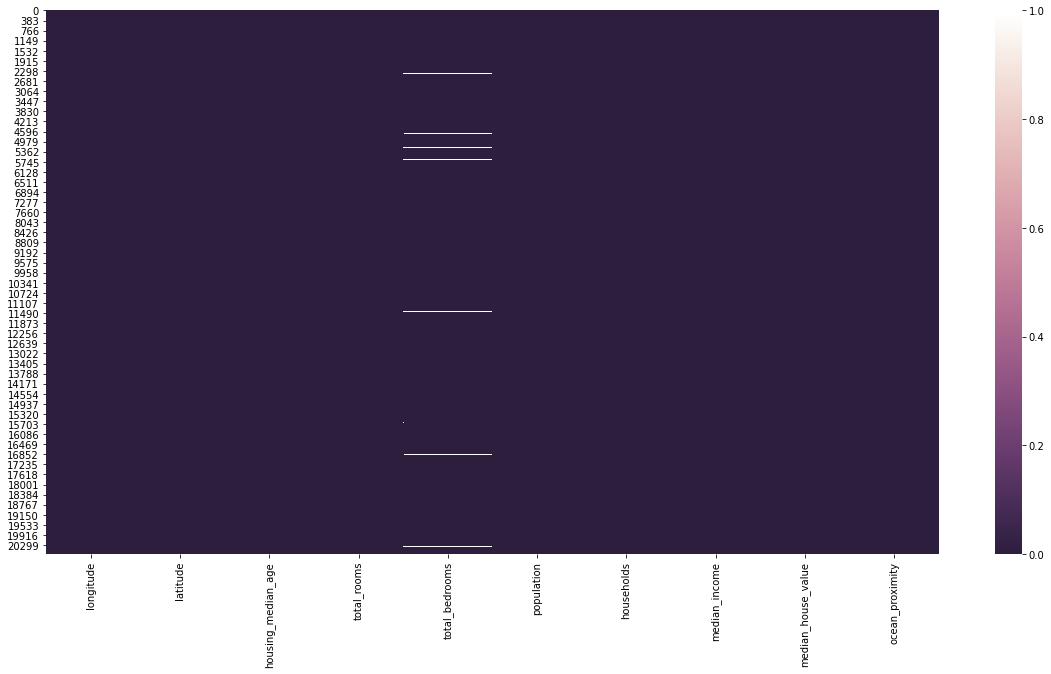

In [ ]:
#%matplotlib inline
_ = plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
_ = sns.heatmap(df_prices.isnull(), cmap=cmap)

We will start by analysing the distributions for median house value first to get a feel for the data.

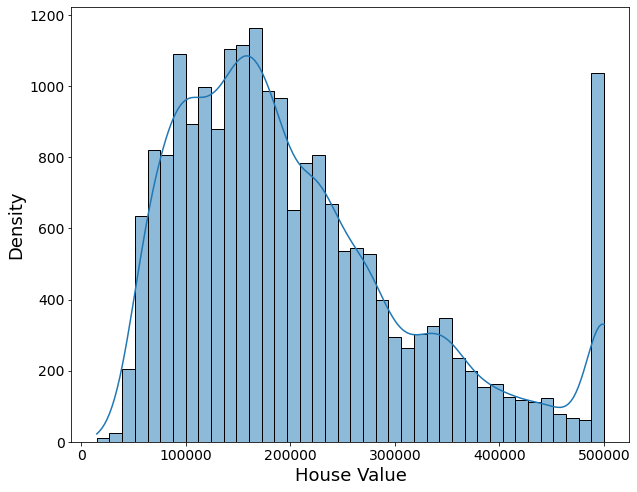

In [ ]:
# Continuous density plot
fig_missing, axes = plt.subplots(1, 1, figsize=(10, 8))

# Plot frequency plot/ histogram
_ = sns.histplot(x="median_house_value", kde=True, data=df_prices, ax=axes, bins=40);
_ = axes.set(xlabel="House Value", ylabel='Density');
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y', labelsize = 14);
axes.tick_params('x', labelsize = 14);

In [ ]:
print("House value summary statistics:\n")
print(df_prices['median_house_value'].describe())

House value summary statistics:

count    20640.000000 
mean     206855.816909
std      115395.615874
min      14999.000000 
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


There is a skew to the right with a huge spike at high end of prices - this is likely to be a data issue. We will
have to investigate.
Maximum price was 5,00,001 dollars and minimum price was around 14,999 dollars.

In [ ]:
# Replace missing values
df_train = df_prices.copy()
median = df_train['total_bedrooms'].median()
df_train['total_bedrooms'].fillna(median, inplace=True)
print("Number of null values in total bedrooms column: {}".format(df_train['total_bedrooms'].isnull().sum()))

Number of null values in total bedrooms column: 0


The null values have been removed.

<div class="alert alert-block alert-info">
<b>Exploration of data</b>
</div>

We start by looking at the number of unique records per variable.

In [ ]:
print(df_train.nunique())

longitude             844  
latitude              862  
housing_median_age    52   
total_rooms           5926 
total_bedrooms        1923 
population            3888 
households            1815 
median_income         12928
median_house_value    3842 
ocean_proximity       5    
dtype: int64


There are no columns with only one value. We therefore retain all columns for ML purposes as there is
enough variability to warrant using the data.

We start by separating continuous and categorical variables for further high level analysis.

In [ ]:
all_vars = list(df_prices.columns.values)
print(all_vars)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [ ]:
# Separate continuous and categorical variables
names_con = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
             'households', 'median_income', 'median_house_value']
names_cat = ['ocean_proximity']

df_train_con = df_train.loc[:, names_con]
df_train_cat = df_train.loc[:, names_cat]

### High level overview

Let's continue with the high level analysis.

#### Continuous variable overview
Most of the variables are continuous

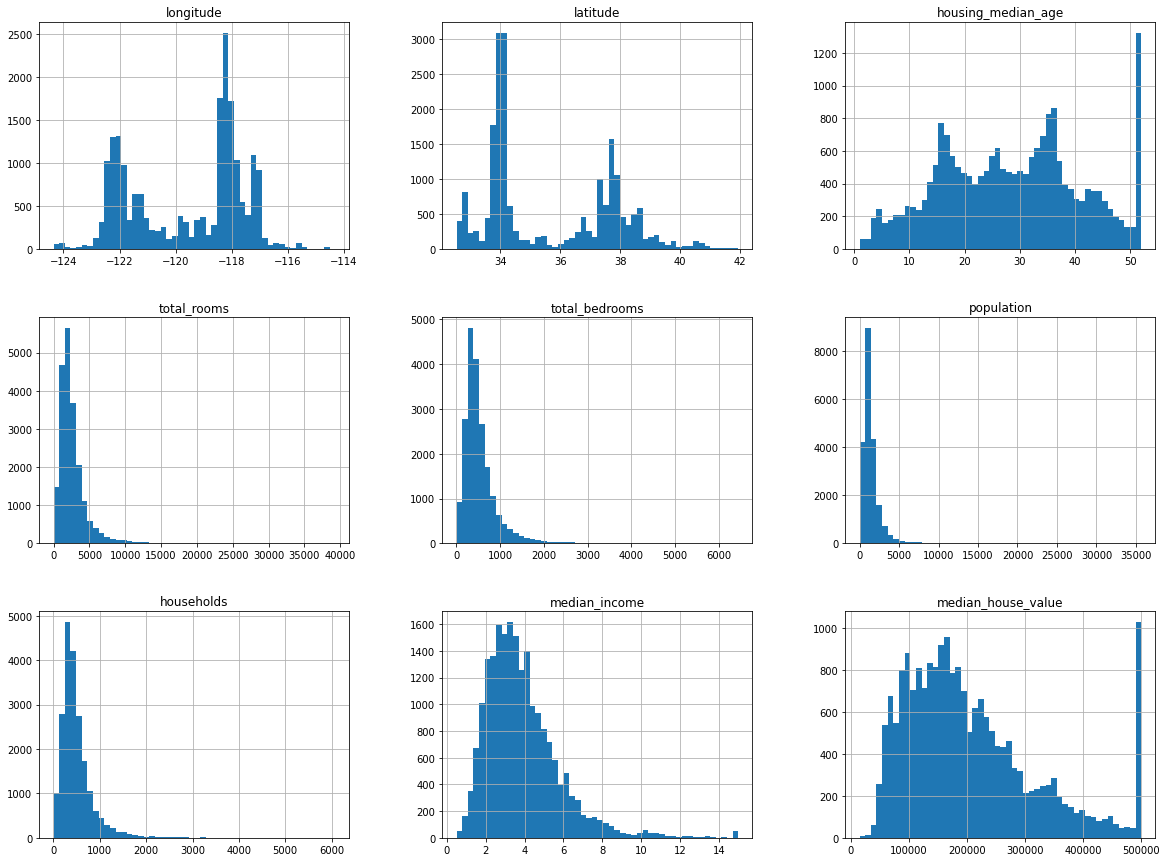

In [ ]:
_ = df_prices.hist(bins=50, figsize=(20,15))
_ = plt.savefig("attribute_histogram_plots")
plt.show()

#### Categorical variable overview

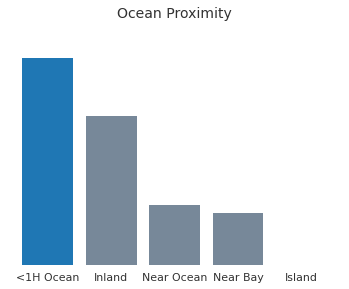

In [ ]:
proximity_counts = df_train_cat['ocean_proximity'].value_counts(normalize = True)
legend_labels = ['<1H Ocean', 'Inland', 'Near Ocean', 'Near Bay', 'Island']

# change the background bar colors to be light grey
bars = plt.bar(proximity_counts.index, proximity_counts.values, align='center', linewidth=0,
               color='lightslategrey')
# make one bar, the <1H Ocean bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
_ = plt.xticks(proximity_counts.index, legend_labels, fontsize=11, alpha=0.8)
_ = plt.title('Ocean Proximity', fontsize=14, pad=30, alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False,
                labelbottom=True)

# Remove the frame - my method
ax = plt.gca()
ax.set_frame_on(False)

Class percentages:

In [ ]:
# Class level counts for categorical variables.
for variable in names_cat:
    print(df_prices[variable].value_counts())
    print("\n")

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND        5   
Name: ocean_proximity, dtype: int64




We now have a look at correlation in the dataset. We use Pearson's Correlation as most of the variables are continuous.

<Figure size 432x288 with 0 Axes>

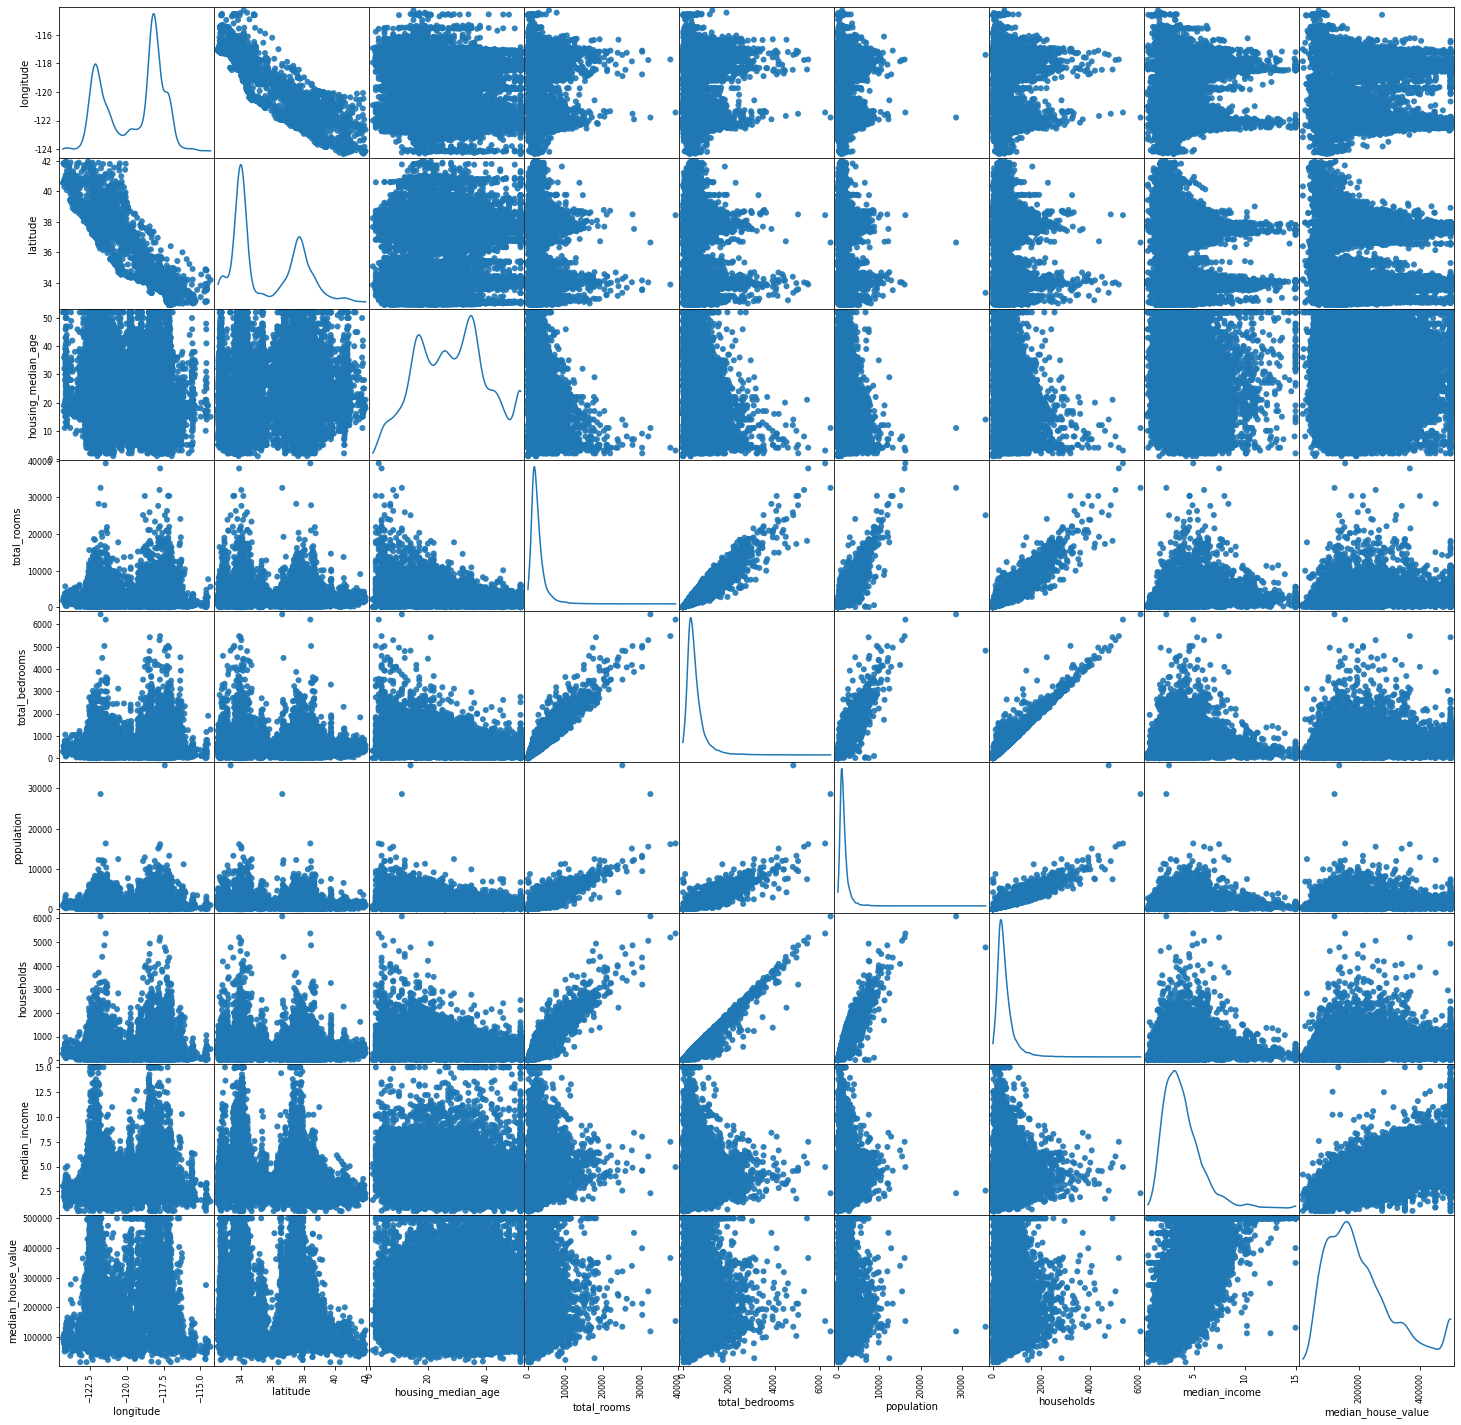

In [ ]:
fig = plt.figure();
_ = scatter_matrix(df, figsize = (25,25), alpha=0.9, diagonal="kde", marker="o");

Let's have a look at a heatmap of prices.

In [ ]:
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df_prices[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map

Now let us try to find the areas where prices are highest by using a Decision Tree.

In [ ]:
X = df_prices.loc[:,["longitude","latitude"]]
y = df_prices.loc[:,"median_house_value"]

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X,y)

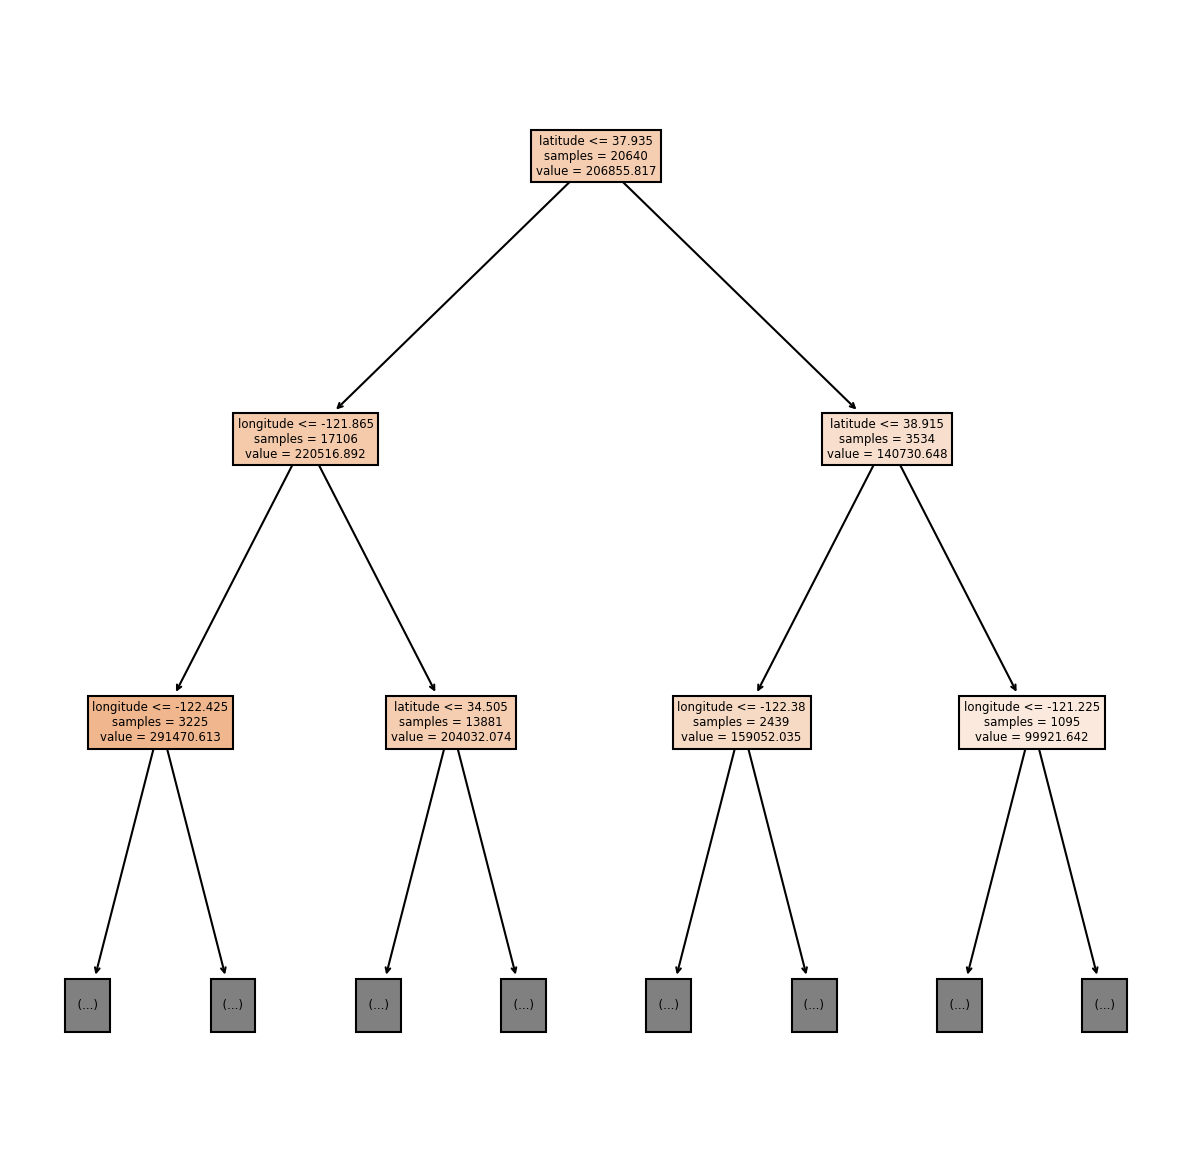

In [ ]:
# Visualising the decision tree regression results
_ = plt.figure(figsize=(10,10), dpi=150)
_ = plot_tree(regressor,max_depth=2,feature_names=X.columns, impurity=False, filled=True)
_ = plt.show()

Let us do a simple scatter plot of longitude vs latitude to see shape of price distribution.

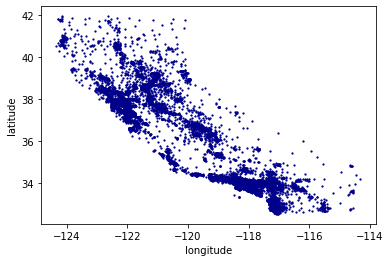

In [ ]:
# A scatter plot of latitude vs longitude
_ = df.plot.scatter(x='longitude',y='latitude',c='DarkBlue',s=1.5)

Let us now annotate this plot with the first two splits in the Decision Tree.


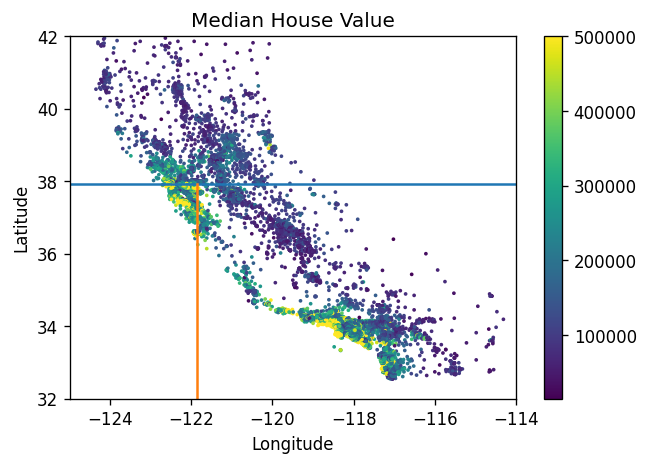

In [ ]:
_ = plt.figure(figsize=[6,4], dpi=120)
_ = plt.ylim(32,42)
_ = plt.xlim(-125,-114)
_ = plt.ylabel("Latitude")
_ = plt.xlabel("Longitude")
_ = plt.title("Median House Value")
# A scatter plot of latitude vs longitude
_ = plt.scatter(x=X["longitude"],y=X["latitude"],c=df["median_house_value"], s=1.5)
# Show first two decision points
splits = regressor.tree_.threshold[:2]
_ = plt.plot([-125,-114],[splits[0],splits[0]])
_ = plt.plot([splits[1],splits[1]],[32,splits[0]])
_ = plt.colorbar()
_ = plt.show()

To conclude this analysis, let's see just how predictive "location" is in terms of house price.

We will build a simple Decision Tree model based on location only and do an accuracy test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regressor_acc = regressor.fit(X_train, y_train)
y_pred = regressor_acc.predict(X_test)
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# MSE - take absolute value first
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(regressor_acc, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

# R-Squared
scoring = 'r2'
results = model_selection.cross_val_score(regressor_acc, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

# Mean Absolute Error
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(regressor_acc, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -3631095084.633 (237631179.056)
R^2: 0.727 (0.015)
MAE: -36649.499 (1077.122)


Based on this simple EDA and model accuracy results we can confirm that location is a very strong predictor of house
prices indeed. An R-squared of 73% is a very strong indication of strong correlation between location and house price
. This is however not a surprise as everyone know that it is all about: "location, location, location"!

